# Generate the figures

## Imports

In [1114]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import os
import pandas as pd


## Make plots pretty

In [1115]:
# Plots configuration.

from tueplots import axes as tue_axes
from tueplots import cycler as tue_cycler
from tueplots import fonts as tue_fonts
from tueplots.constants import markers as tue_markers
from tueplots.constants.color import palettes as tue_palettes

plt.rcParams.update({"figure.dpi": 80})
plt.rcParams.update(tue_axes.spines(left=True, right=False, top=False, bottom=True))
plt.rcParams.update(tue_axes.grid())
plt.rcParams.update(tue_cycler.cycler(color=tue_palettes.high_contrast))
plt.rcParams.update(tue_axes.legend(shadow=False, frameon=False, fancybox=False))
plt.rcParams.update(tue_fonts.neurips2021_tex(family="sans-serif"))

## Load the data

In [1116]:
# Define the paths where to read the results.
data_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/data/"
nmf_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/evaluate/scores_nmf.pkl"
mofa_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/evaluate/scores_mofa.pkl"
seurat_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/evaluate/scores_seurat.pkl"
mowgli_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/evaluate/scores_mowgli.pkl"

# Load the results from the pickle files.
with open(mofa_path, "rb") as f:
    scores_dict_mofa = pickle.load(f)
with open(nmf_path, "rb") as f:
    scores_dict_nmf = pickle.load(f)
with open(mowgli_path, "rb") as f:
    scores_dict_mowgli = pickle.load(f)
with open(seurat_path, "rb") as f:
    scores_dict_seurat = pickle.load(f)

# Fuse two dictionaries.
scores_dict = {
    **scores_dict_mofa,
    **scores_dict_nmf,
    **scores_dict_mowgli,
    **scores_dict_seurat,
}


In [1117]:
# Turn the scores into a dataframe.
scores_df = pd.DataFrame(scores_dict).T

In [1118]:
scores_df.head()

,Silhouette score,Purity scores,k range,ARIs,res_range,ARIs after denoising
bmcite_mofa_15,0.238895,"[0.9056470825086328, 0.9046908029394124, 0.903...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6743607069016149, 0.8034324448662014, 0.820...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6949856706059533, 0.8503880878873196, 0.845..."
bmcite_mofa_30,0.183466,"[0.9151763245312562, 0.9126933530182754, 0.910...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.690057111424541, 0.6968047268134557, 0.8585...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6948632482370601, 0.8643397305530547, 0.850..."
bmcite_mofa_50,0.193339,"[0.9169882226623184, 0.9140019461129301, 0.912...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6934023092578602, 0.7069116302274089, 0.807...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6912853996635479, 0.8768654768056323, 0.868..."
liu_mofa_15,0.506056,"[0.9999999999999997, 0.9999999999999997, 0.999...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 0.7802293946278607, 0.7379244134601...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[1.0, 0.7812749296340264, 0.7812749296340264, ..."
liu_mofa_30,0.402337,"[0.9999999999999997, 0.9999999999999997, 0.999...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 0.7857988526636153, 0.7857988526636...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[1.0, 1.0, 0.7857988526636153, 0.7857988526636..."


In [1119]:
# Add a column for the method.

idx = scores_df.index.to_series().str.contains("mofa")
scores_df.loc[idx, "Method"] = "MOFA+"

idx = scores_df.index.to_series().str.contains("nmf")
scores_df.loc[idx, "Method"] = "NMF"

idx = scores_df.index.to_series().str.contains("mowgli")
scores_df.loc[idx, "Method"] = "Mowgli"

idx = scores_df.index.to_series().str.contains("seurat")
scores_df.loc[idx, "Method"] = "Seurat"

In [1120]:
# Add a column for the dataset.

idx = scores_df.index.to_series().str.contains("pbmc")
scores_df.loc[idx, "Dataset"] = "10X PBMC"

idx = scores_df.index.to_series().str.contains("liu")
scores_df.loc[idx, "Dataset"] = "Liu"

idx = scores_df.index.to_series().str.contains("sim1")
scores_df.loc[idx, "Dataset"] = "Simulated 1"

idx = scores_df.index.to_series().str.contains("sim2")
scores_df.loc[idx, "Dataset"] = "Simulated 2"

idx = scores_df.index.to_series().str.contains("sim3")
scores_df.loc[idx, "Dataset"] = "Simulated 3"

idx = scores_df.index.to_series().str.contains("sim4")
scores_df.loc[idx, "Dataset"] = "Simulated 4"

idx = scores_df.index.to_series().str.contains("sim5")
scores_df.loc[idx, "Dataset"] = "Simulated 5"

idx = scores_df.index.to_series().str.contains("bmcite")
scores_df.loc[idx, "Dataset"] = "Bone Marrow CITE-seq"

idx = scores_df.index.to_series().str.contains("opcite")
scores_df.loc[idx, "Dataset"] = "Open Problems CITE-seq"

idx = scores_df.index.to_series().str.contains("opmultiome")
scores_df.loc[idx, "Dataset"] = "Open Problems Multiome"

In [1121]:
# Add a column for the latent dimension.

idx = scores_df.index.to_series().str.contains("5")
scores_df.loc[idx, "Latent dimension"] = "5"

idx = scores_df.index.to_series().str.contains("15")
scores_df.loc[idx, "Latent dimension"] = "15"

idx = scores_df.index.to_series().str.contains("30")
scores_df.loc[idx, "Latent dimension"] = "30"

idx = scores_df.index.to_series().str.contains("50")
scores_df.loc[idx, "Latent dimension"] = "50"

In [1122]:
scores_df.head()

,Silhouette score,Purity scores,k range,ARIs,res_range,ARIs after denoising,Method,Dataset,Latent dimension
bmcite_mofa_15,0.238895,"[0.9056470825086328, 0.9046908029394124, 0.903...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6743607069016149, 0.8034324448662014, 0.820...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6949856706059533, 0.8503880878873196, 0.845...",MOFA+,Bone Marrow CITE-seq,15
bmcite_mofa_30,0.183466,"[0.9151763245312562, 0.9126933530182754, 0.910...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.690057111424541, 0.6968047268134557, 0.8585...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6948632482370601, 0.8643397305530547, 0.850...",MOFA+,Bone Marrow CITE-seq,30
bmcite_mofa_50,0.193339,"[0.9169882226623184, 0.9140019461129301, 0.912...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.6934023092578602, 0.7069116302274089, 0.807...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[0.6912853996635479, 0.8768654768056323, 0.868...",MOFA+,Bone Marrow CITE-seq,50
liu_mofa_15,0.506056,"[0.9999999999999997, 0.9999999999999997, 0.999...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 0.7802293946278607, 0.7379244134601...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[1.0, 0.7812749296340264, 0.7812749296340264, ...",MOFA+,Liu,15
liu_mofa_30,0.402337,"[0.9999999999999997, 0.9999999999999997, 0.999...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.0, 1.0, 0.7857988526636153, 0.7857988526636...","[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,...","[1.0, 1.0, 0.7857988526636153, 0.7857988526636...",MOFA+,Liu,30


In [1123]:
# scores_df.loc[scores_df["Method"] != "Seurat", "ARIs"] = scores_df.loc[scores_df["Method"] != "Seurat", "ARIs after denoising"]

In [1124]:
# Make a new dataframe with individual ARI scores for each resolution.

ari_res = []  # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over resolutions.
    for i, res in enumerate(scores_df.loc[xp_name, "res_range"]):

        # Add the ARI to the list.
        ari_res.append(
            {
                "xp_name": xp_name,
                "Dataset": scores_df.loc[xp_name, "Dataset"],
                "Method": scores_df.loc[xp_name, "Method"],
                "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
                "Resolution": res,
                "ARI": scores_df.loc[xp_name, "ARIs"][i],
            }
        )

# Turn the list into a dataframe.
ari_res = pd.DataFrame(ari_res)


In [1125]:
# Make a new dataframe with individual purity scores depending on k.

purity_res = [] # Initialize the list that will be turned into a dataframe.

# Iterate over experiments.
for xp_name in scores_df.index:

    # Iterate over k nearest neighbours.
    for i, k in enumerate(scores_df.loc[xp_name, "k range"]):

        # Add the purity score to the list.
        purity_res.append({
            "xp_name": xp_name,
            "Dataset": scores_df.loc[xp_name, "Dataset"],
            "Method": scores_df.loc[xp_name, "Method"],
            "Latent dimension": str(scores_df.loc[xp_name, "Latent dimension"]),
            "k": k,
            "Purity score": scores_df.loc[xp_name, "Purity scores"][i]
        })

# Turn the list into a dataframe.
purity_res = pd.DataFrame(purity_res)

## Supplementary figure 1 -- Mowgli depending on latent dimension

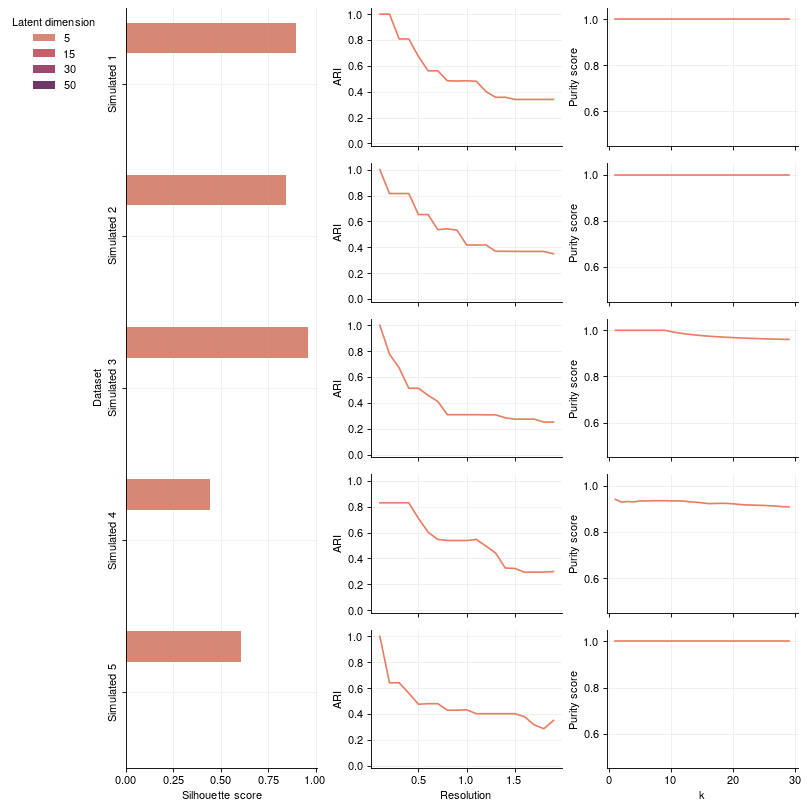

In [1126]:
# List the datasets.

datasets = [
    "Simulated 1",
    "Simulated 2",
    "Simulated 3",
    "Simulated 4",
    "Simulated 5",
]

palette = sns.color_palette("flare", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "Mowgli")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "Mowgli")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "Mowgli")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(.45, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()

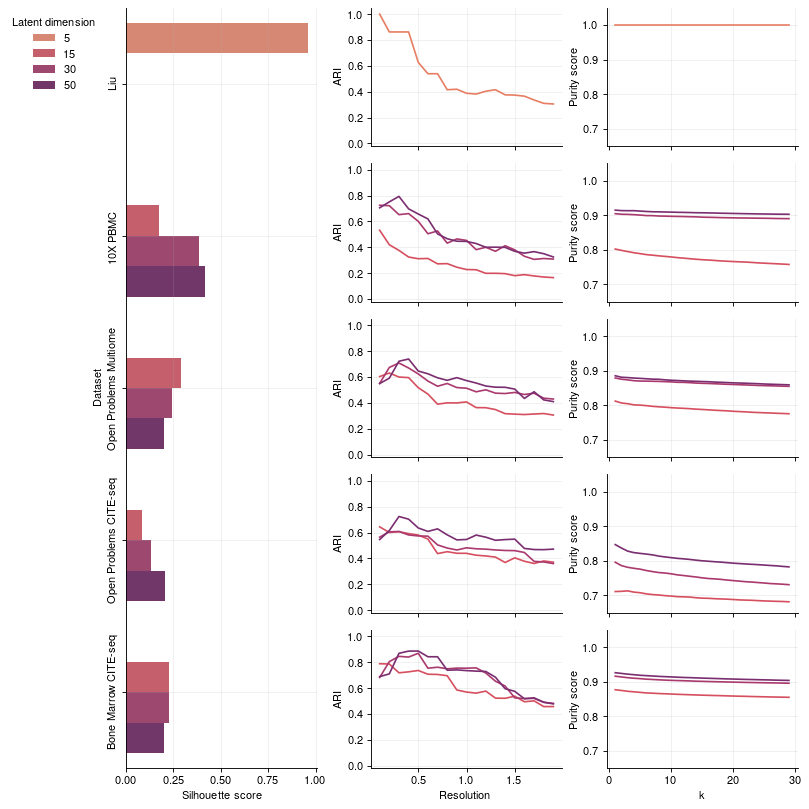

In [1127]:
# List the datasets.

datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

palette = sns.color_palette("flare", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "Mowgli")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "Mowgli")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "Mowgli")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(.65, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()

## Supplementary figure 1 -- MOFA depending on latent dimension

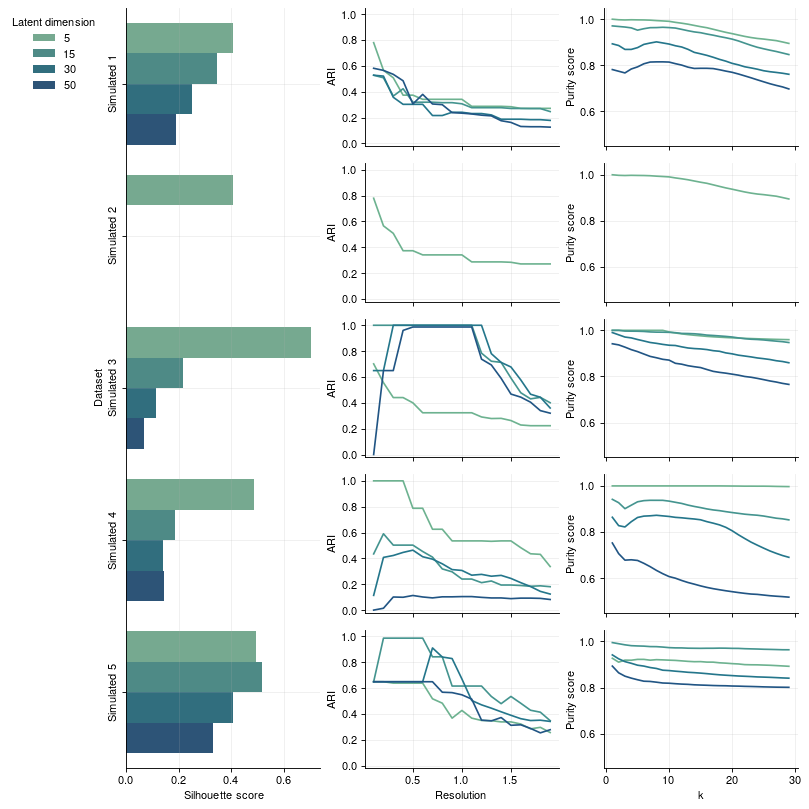

In [1128]:
# List the datasets.

datasets = [
    "Simulated 1",
    "Simulated 2",
    "Simulated 3",
    "Simulated 4",
    "Simulated 5",
]

palette = sns.color_palette("crest", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "MOFA+")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "MOFA+")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "MOFA+")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(.45, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()

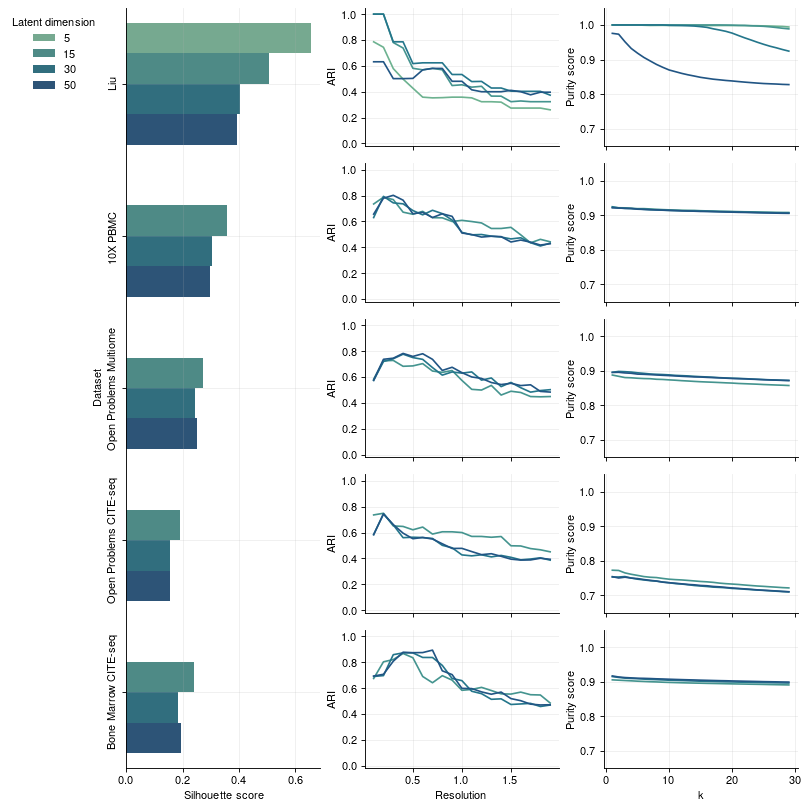

In [1129]:
# List the datasets.

datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

palette = sns.color_palette("crest", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "MOFA+")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "MOFA+")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "MOFA+")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(.65, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()

## Supplementary figure 1 -- NMF depending on latent dimension

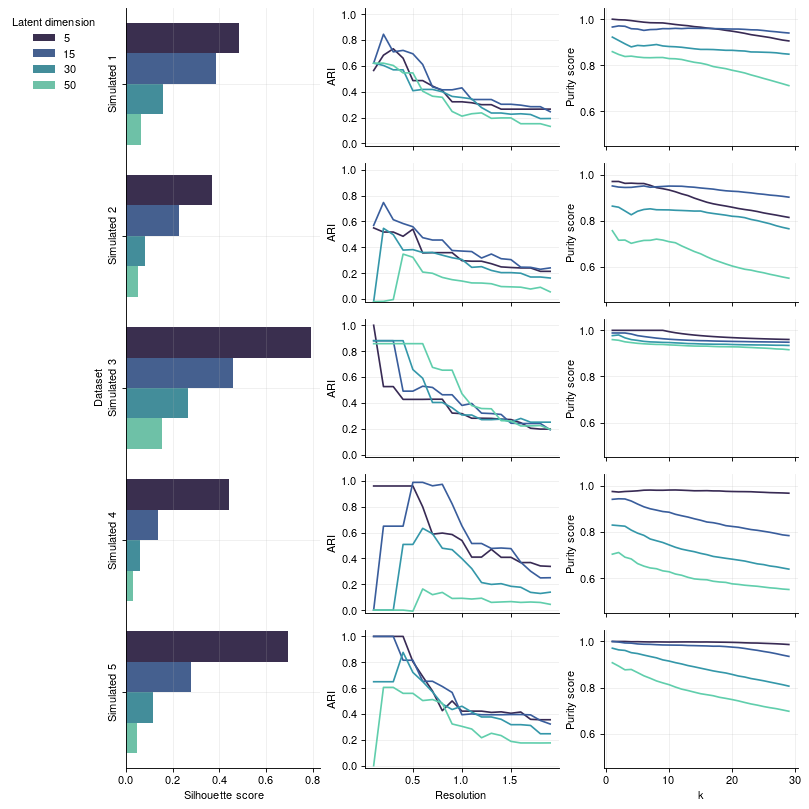

In [1130]:
# List the datasets.

datasets = [
    "Simulated 1",
    "Simulated 2",
    "Simulated 3",
    "Simulated 4",
    "Simulated 5",
]

palette = sns.color_palette("mako", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "NMF")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "NMF")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "NMF")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        hue_order=["5", "15", "30", "50"],
        palette=palette,
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(.45, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()

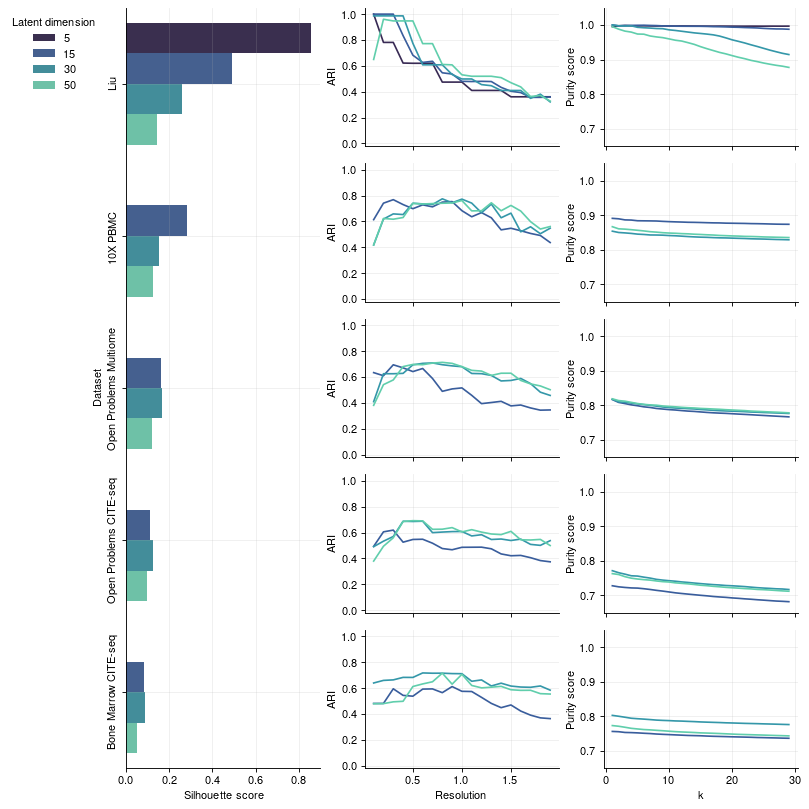

In [1131]:
# List the datasets.

datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

palette = sns.color_palette("mako", n_colors=4)

for i in range(len(datasets)):
    idx = scores_df["Dataset"].str.contains(datasets[i])
    scores_df.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df["Dataset"].str.contains("|".join(datasets))
idx = idx & (scores_df["Method"] == "NMF")
sns.barplot(
    data=scores_df.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Latent dimension",
    hue_order=["5", "15", "30", "50"],
    palette=palette,
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Latent dimension",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res["ARI"].min()
ymax = ari_res["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res["Dataset"].str.contains(datasets[i])
    idx = idx & (ari_res["Method"] == "NMF")
    sns.lineplot(
        data=ari_res.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Latent dimension",
        ax=ax,
        hue_order=["5", "15", "30", "50"],
        palette=palette,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res["Purity score"].min()
ymax = purity_res["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res["Dataset"].str.contains(datasets[i])
    idx = idx & (purity_res["Method"] == "NMF")
    sns.lineplot(
        data=purity_res.loc[idx],
        x="k",
        y="Purity score",
        hue="Latent dimension",
        ax=ax,
        hue_order=["5", "15", "30", "50"],
        palette=palette,
    )
    ax.get_legend().remove()
    ax.set(ylim=(0.65, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()


## Figure 1 -- All methods

In [1132]:
# Select only certain latent dimensions

idx = (scores_df["Latent dimension"] == "5") & (scores_df["Method"] == "MOFA+") & (scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Latent dimension"] == "15") & (scores_df["Method"] == "MOFA+") & (~scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Latent dimension"] == "5") & (scores_df["Method"] == "Mowgli") & (scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Latent dimension"] == "50") & (scores_df["Method"] == "Mowgli") & (~scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Latent dimension"] == "5") & (scores_df["Method"] == "NMF") & (scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Latent dimension"] == "30") & (scores_df["Method"] == "NMF") & (~scores_df["Dataset"].str.contains("Liu|Simulated"))
idx |= (scores_df["Method"] == "Seurat")
scores_df_sub = scores_df.loc[idx]

idx = (ari_res["Latent dimension"] == "5") & (ari_res["Method"] == "MOFA+") & (ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Latent dimension"] == "15") & (ari_res["Method"] == "MOFA+") & (~ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Latent dimension"] == "5") & (ari_res["Method"] == "Mowgli") & (ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Latent dimension"] == "50") & (ari_res["Method"] == "Mowgli") & (~ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Latent dimension"] == "5") & (ari_res["Method"] == "NMF") & (ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Latent dimension"] == "30") & (ari_res["Method"] == "NMF") & (~ari_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (ari_res["Method"] == "Seurat")
ari_res_sub = ari_res.loc[idx]

idx = (purity_res["Latent dimension"] == "5") & (purity_res["Method"] == "MOFA+") & (purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Latent dimension"] == "15") & (purity_res["Method"] == "MOFA+") & (~purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Latent dimension"] == "5") & (purity_res["Method"] == "Mowgli") & (purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Latent dimension"] == "50") & (purity_res["Method"] == "Mowgli") & (~purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Latent dimension"] == "5") & (purity_res["Method"] == "NMF") & (purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Latent dimension"] == "30") & (purity_res["Method"] == "NMF") & (~purity_res["Dataset"].str.contains("Liu|Simulated"))
idx |= (purity_res["Method"] == "Seurat")
purity_res_sub = purity_res.loc[idx]

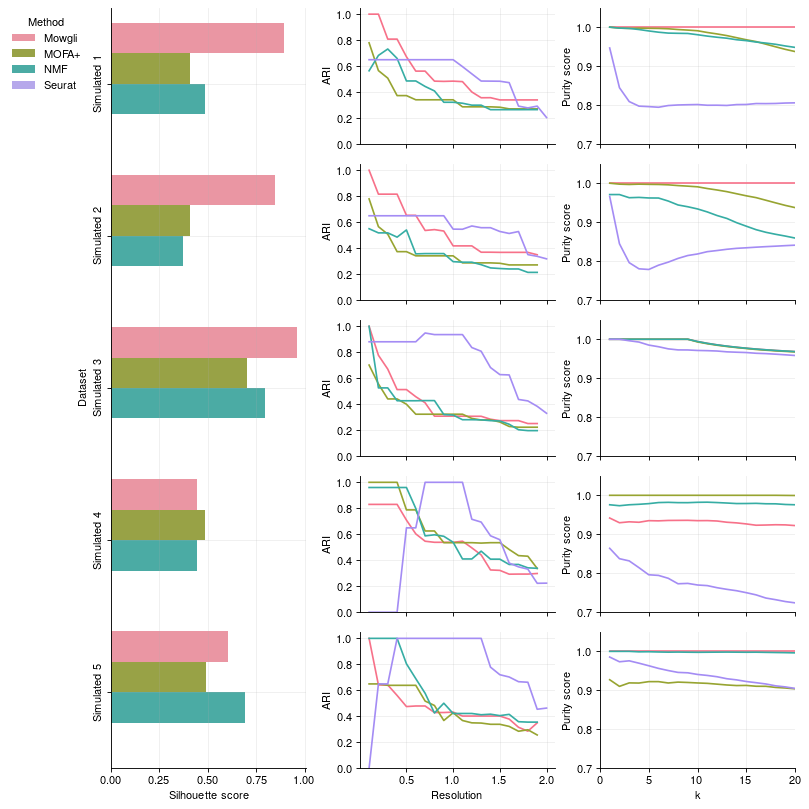

In [1139]:
# List the datasets.

datasets = [
    "Simulated 1",
    "Simulated 2",
    "Simulated 3",
    "Simulated 4",
    "Simulated 5",
]

for i in range(len(datasets)):
    idx = scores_df_sub["Dataset"].str.contains(datasets[i])
    scores_df_sub.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df_sub["Dataset"].str.contains("|".join(datasets))
sns.barplot(
    data=scores_df_sub.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Method",
    hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Method",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res_sub["ARI"].min()
ymax = ari_res_sub["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res_sub["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=ari_res_sub.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Method",
        hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res_sub["Purity score"].min()
ymax = purity_res_sub["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res_sub["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=purity_res_sub.loc[idx],
        x="k",
        y="Purity score",
        hue="Method",
        hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(0.7, ymax))
    ax.set(xlim=(0, 20))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()


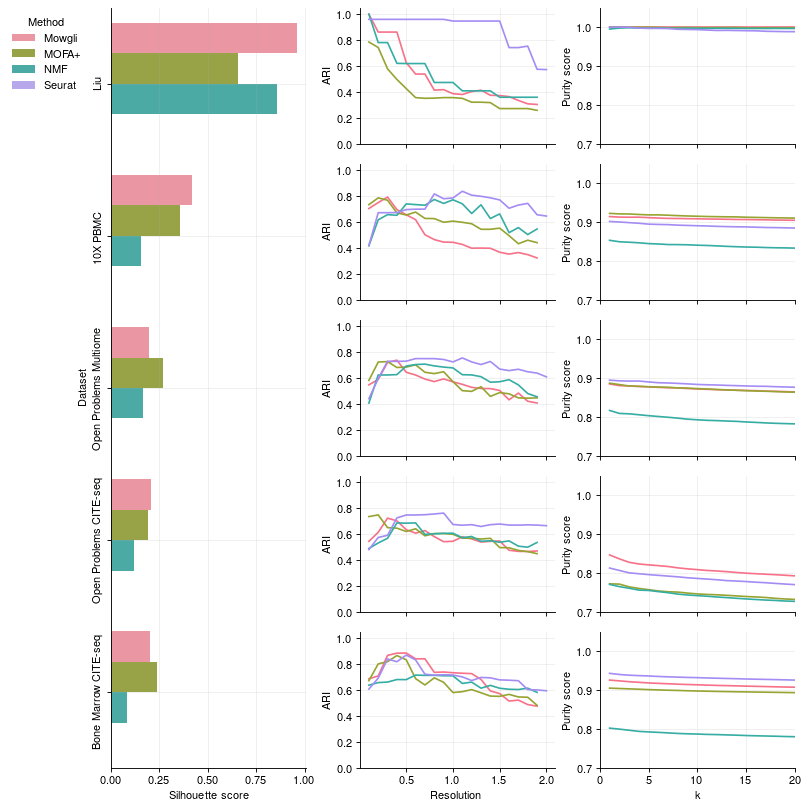

In [1142]:
# List the datasets.

datasets = [
    "Liu",
    "10X PBMC",
    "Open Problems Multiome",
    "Open Problems CITE-seq",
    "Bone Marrow CITE-seq",
]

for i in range(len(datasets)):
    idx = scores_df_sub["Dataset"].str.contains(datasets[i])
    scores_df_sub.loc[idx, "Order"] = i

# Define the subplots.
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
axes = fig.subplot_mosaic(
    """
    ABC
    ADE
    AFG
    AHI
    AJK
    """
)

# Visualize the silhouette score as a bar plot.
idx = scores_df_sub["Dataset"].str.contains("|".join(datasets))
sns.barplot(
    data=scores_df_sub.loc[idx],
    y="Dataset",
    x="Silhouette score",
    hue="Method",
    hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
    order=datasets,
    ax=axes["A"],
)
axes["A"].legend(
    title="Method",
    bbox_to_anchor=(-0.1, 1),
    ncol=1,
)
axes["A"].set_yticklabels(axes["A"].get_yticklabels(), rotation=90, va="center")

# Visualize the ARI as a line plot.
ymin = ari_res_sub["ARI"].min()
ymax = ari_res_sub["ARI"].max() + 0.05
for i, ax in enumerate([axes["B"], axes["D"], axes["F"], axes["H"], axes["J"]]):
    idx = ari_res_sub["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=ari_res_sub.loc[idx],
        x="Resolution",
        y="ARI",
        hue="Method",
        hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(ylim=(ymin, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

# Visualize the purity score as a line plot.
ymin = purity_res_sub["Purity score"].min()
ymax = purity_res_sub["Purity score"].max() + 0.05
for i, ax in enumerate([axes["C"], axes["E"], axes["G"], axes["I"], axes["K"]]):
    idx = purity_res_sub["Dataset"].str.contains(datasets[i])
    sns.lineplot(
        data=purity_res_sub.loc[idx],
        x="k",
        y="Purity score",
        hue="Method",
        hue_order=["Mowgli", "MOFA+", "NMF", "Seurat"],
        ax=ax,
    )
    ax.get_legend().remove()
    ax.set(xlim=(0, 20))
    ax.set(ylim=(.7, ymax))
    if i < len(datasets) - 1:
        ax.set_xticklabels([])
        ax.set(xlabel=None)

for i in axes:
    axes[i].grid()
